<a href="https://colab.research.google.com/github/Vaish-mambady/Traffic-Sign-Classification-using-MLP/blob/main/Traffic_Sign_Classification_using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##  DEEP LEARNING INTERNSHIP PROGRAM

### GRADED Mini Project 1: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

DOWNLOAD & EXTRACT DATA FROM: https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip


* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:

!wget https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip FullIJCNN2013.zip


--2025-04-27 10:27:06--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1661866983 (1.5G) [application/zip]
Saving to: ‘FullIJCNN2013.zip’

FullIJCNN2013.zip   100%[===================>]   1.55G  32.6MB/s    in 41s     

2025-04-27 10:27:47 (38.4 MB/s) - ‘FullIJCNN2013.zip’ saved [1661866983/1661866983]

Archive:  FullIJCNN2013.zip
   creating: FullIJCNN2013/
   creating: FullIJCNN2013/00/
  inflating: FullIJCNN2013/00000.ppm  
  inflating: FullIJCNN2013/00001.ppm  
  inflating: FullIJCNN2013/00002.ppm  
  inflating: FullIJCNN2013/00003.ppm  
  inflating: FullIJCNN2013/00004.ppm  
  inflating: FullIJCNN2013/00005.ppm  
  inflating: FullIJCNN2013/00006.ppm  
  inflating: FullIJCNN2013/00007.ppm  
  inflating: FullIJCNN2013/00008.ppm  
  inflating: FullIJCNN2013/00009.

In [ ]:

dataset_path = "FullIJCNN2013"

from PIL import Image

features = []
labels = []

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((30, 30))
    img_array = np.array(img)
    img_flat = img_array.flatten()
    return img_flat

for class_folder_name in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_folder_name)
    if os.path.isdir(class_folder_path) and class_folder_name.isdigit():
        label = int(class_folder_name)
        for image_filename in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_filename)
            img_feature = load_and_preprocess_image(image_path)
            features.append(img_feature)
            labels.append(label)

X = np.array(features)
y = np.array(labels)

print("✅ Data loaded and processed successfully!")
print(f"Feature shape: {X.shape}")
print(f"Label shape: {y.shape}")



✅ Data loaded and processed successfully!
Feature shape: (1213, 2700)
Label shape: (1213,)


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

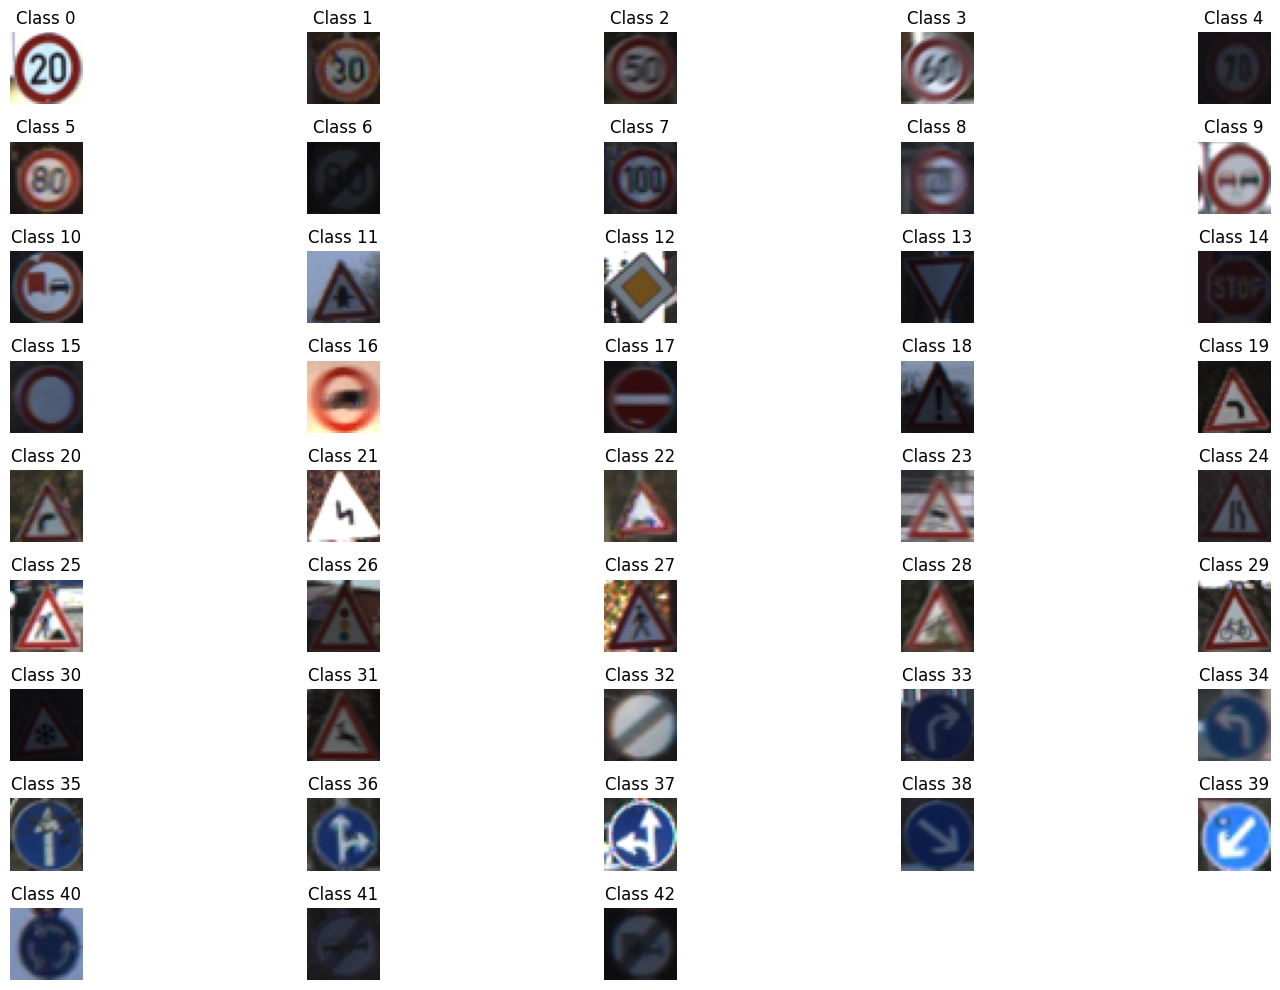

In [ ]:
# Plot sample image from each class
plt.figure(figsize=(15, 10))

# Get unique classes
unique_classes = np.unique(y)
n_classes = len(unique_classes)

# Create subplots - 5 columns, rows as needed
cols = 5
rows = int(np.ceil(n_classes / cols))

for i, class_id in enumerate(unique_classes):
    # Find first image of this class
    class_idx = np.where(y == class_id)[0][0]
    img = X[class_idx].reshape(30, 30, 3)  # Reshape to original dimensions

    plt.subplot(rows, cols, i+1)
    plt.imshow(img.astype('uint8'))
    plt.title(f'Class {class_id}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Plot the distribution of Classes

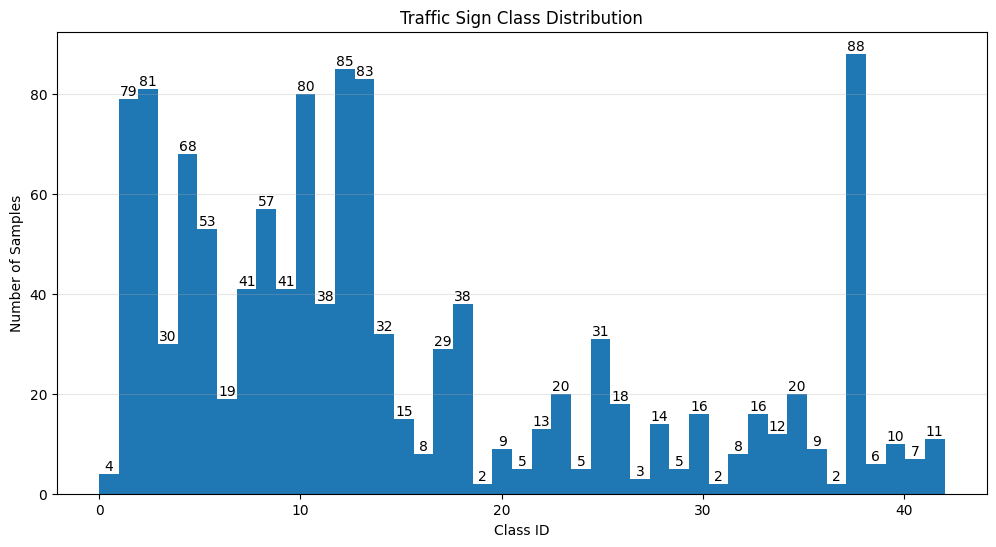

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.hist(y, bins=len(np.unique(y)), rwidth=0.8, color='skyblue')
plt.title('Traffic Sign Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Number of Samples')
plt.grid(axis='y', alpha=0.3)

# Add counts above each bar
counts, bins, patches = plt.hist(y, bins=len(np.unique(y)))
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width()/2,
                 patch.get_height(),
                 f'{int(count)}',
                 ha='center',
                 va='bottom')

plt.show()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
from sklearn.preprocessing import normalize

# Normalize features (each image independently)
X_normalized = normalize(X, norm='max', axis=1)  # axis=1 normalizes each sample (row)

# Verification
print("Before normalization - Min:", X.min(), "Max:", X.max())
print("After normalization - Min:", X_normalized.min(), "Max:", X_normalized.max())
print("Sample normalized values:\n", X_normalized[0][:10])  # Show first 10 pixels of first image

Before normalization - Min: 0 Max: 255
After normalization - Min: 0.0 Max: 1.0
Sample normalized values:
 [0.94117647 0.89019608 0.88627451 1.         0.98431373 0.98431373
 1.         1.         1.         1.        ]


### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # Corrected import
from sklearn.metrics import accuracy_score, classification_report

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate MLP models
def train_evaluate_mlp(hidden_layers, X_train, y_train, X_test, y_test, name=""):
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        activation='relu',
        solver='adam',
        random_state=42,
        max_iter=1000
    ).fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

# Compare two architectures
train_evaluate_mlp((100,), X_train, y_train, X_test, y_test, "Single Layer (100)")
train_evaluate_mlp((128, 64), X_train, y_train, X_test, y_test, "Dual Layer (128,64)")


Single Layer (100) Performance:
Accuracy: 0.8807
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16
           2       0.89      1.00      0.94        16
           3       1.00      0.50      0.67         6
           4       1.00      1.00      1.00        14
           5       0.83      0.91      0.87        11
           6       0.80      1.00      0.89         4
           7       0.78      0.88      0.82         8
           8       0.90      0.82      0.86        11
           9       1.00      0.75      0.86         8
          10       0.88      0.94      0.91        16
          11       0.89      1.00      0.94         8
          12       0.93      0.82      0.88        17
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00         6
          15       0.43      1.00      0.60         3
          16       1.00      0.

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Step 2: Normalize the features (if not already normalized)
from sklearn.preprocessing import normalize
X_normalized = normalize(X, axis=1, norm='l2')  # Ensure features have unit norm

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Step 4: Define parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [300, 500, 700]
}

# Step 5: Initialize the MLP classifier
mlp = MLPClassifier(random_state=42)

# Step 6: Use GridSearchCV to tune hyperparameters
print("Starting GridSearchCV...")
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Step 7: Get the best parameters and best estimator
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_
print("Best Parameters from GridSearchCV:", best_params_grid)

# Step 8: Evaluate the best model from GridSearchCV
y_pred_grid = best_model_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy using best parameters (GridSearchCV): {accuracy_grid:.2f}")
print("Classification Report (GridSearchCV):")
print(classification_report(y_test, y_pred_grid))

# Step 9: Optional - Use RandomizedSearchCV to tune hyperparameters
print("\nStarting RandomizedSearchCV...")
param_dist = {
    'hidden_layer_sizes': [(128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': randint(300, 800)
}

random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Step 10: Get the best parameters and best estimator from RandomizedSearchCV
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_
print("Best Parameters from RandomizedSearchCV:", best_params_random)

# Step 11: Evaluate the best model from RandomizedSearchCV
y_pred_random = best_model_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Accuracy using best parameters (RandomizedSearchCV): {accuracy_random:.2f}")
print("Classification Report (RandomizedSearchCV):")
print(classification_report(y_test, y_pred_random))

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64)}
Best CV accuracy: 0.8454


#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(128,64), max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "K-NN": KNeighborsClassifier(n_neighbors=3)
}

# Train and evaluate each model
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

# Display comparison
print("\nModel Comparison:")
print("-" * 30)
for name, acc in sorted(results, key=lambda x: x[1], reverse=True):
    print(f"{name:<15} {acc:.4f}")


MLP Performance:
Accuracy: 0.8930
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16
           2       0.88      0.94      0.91        16
           3       1.00      0.67      0.80         6
           4       1.00      1.00      1.00        14
           5       0.85      1.00      0.92        11
           6       0.80      1.00      0.89         4
           7       0.88      0.88      0.88         8
           8       0.91      0.91      0.91        11
           9       0.86      0.75      0.80         8
          10       0.94      0.94      0.94        16
          11       1.00      1.00      1.00         8
          12       0.94      0.88      0.91        17
          13       1.00      1.00      1.00        17
          14       1.00      0.67      0.80         6
          15       0.75      1.00      0.86         3
          16       1.00      0.50      0.67   

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
from keras.layers import Input

# Step 1 - Build the architecture
model = keras.Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit input layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(len(np.unique(y)), activation='softmax')
])

In [ ]:
# Step 2 - Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.1301 - loss: 3.6577 - val_accuracy: 0.1975 - val_loss: 3.3123
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4198 - loss: 2.4685 - val_accuracy: 0.3992 - val_loss: 2.7067
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5262 - loss: 1.9888 - val_accuracy: 0.5185 - val_loss: 2.2859
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6187 - loss: 1.6440 - val_accuracy: 0.3909 - val_loss: 2.3807
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6834 - loss: 1.4169 - val_accuracy: 0.4938 - val_loss: 2.0362
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6711 - loss: 1.3002 - val_accuracy: 0.5556 - val_loss: 1.6955
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7289 - loss: 1.1146 - val_accuracy: 0.4650 - val_loss: 1.7382
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7241 - loss: 1.0977 - val_accuracy: 0.5720 - val_los

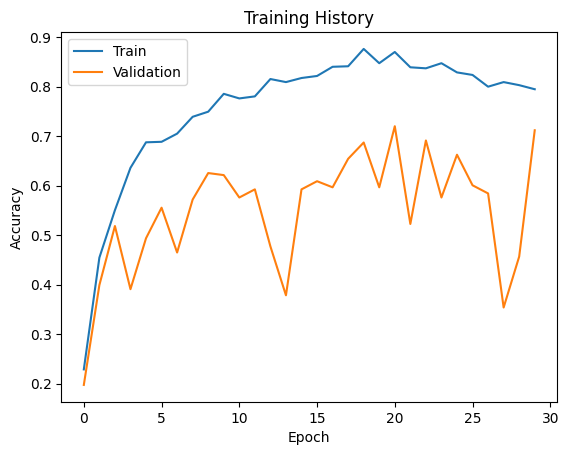

In [ ]:
# Step 3 - Fit and Evaluate
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
#for visualisation
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

# Step 1 - Build equivalent architecture
model = keras.Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),     # First hidden layer (matches MLP's 128 units)
    Dropout(0.0),                      # No dropout (MLP didn't use dropout)
    Dense(64, activation='relu'),      # Second hidden layer (matches MLP's 64 units)
    Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

# Step 2 - Compile with equivalent parameters
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Default Adam lr matches sklearn's MLP
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Step 3 - Fit with comparable settings
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,                          # sklearn's max_iter=1000 but epochs work differently
    batch_size=32,                       # Default batch size
    verbose=1
)

# Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.0881 - loss: 3.6292 - val_accuracy: 0.2716 - val_loss: 3.0487
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3069 - loss: 2.8336 - val_accuracy: 0.4033 - val_loss: 2.4974
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3894 - loss: 2.4011 - val_accuracy: 0.4033 - val_loss: 2.2460
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4384 - loss: 2.1279 - val_accuracy: 0.5226 - val_loss: 1.8710
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5300 - loss: 1.7961 - val_accuracy: 0.5144 - val_loss: 1.8206
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5664 - loss: 1.6380 - val_accuracy: 0.5761 - val_loss: 1.5304
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5730 - loss: 1.4738 - val_accuracy: 0.6091 - val_loss: 1.4645
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6225 - loss: 1.3978 - val_accuracy: 0.6790 -

#### Experiment using Dropout, Regularization and Batch Normalization

2.18.0
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.0760 - loss: 4.2708 - val_accuracy: 0.2016 - val_loss: 3.7989
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2984 - loss: 3.1316 - val_accuracy: 0.3374 - val_loss: 3.2732
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4424 - loss: 2.6180 - val_accuracy: 0.4815 - val_loss: 2.9666
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5254 - loss: 2.3308 - val_accuracy: 0.4362 - val_loss: 2.9150
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5668 - loss: 2.1052 - val_accuracy: 0.5021 - val_loss: 2.5716
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6124 - loss: 1.9183 - val_accuracy: 0.5802 - val_loss: 2.2020
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6331 - loss: 1.8120 - val_accuracy: 0.5967 - val_loss: 2.0616
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7079 - loss: 1.6568 - val_accuracy: 0

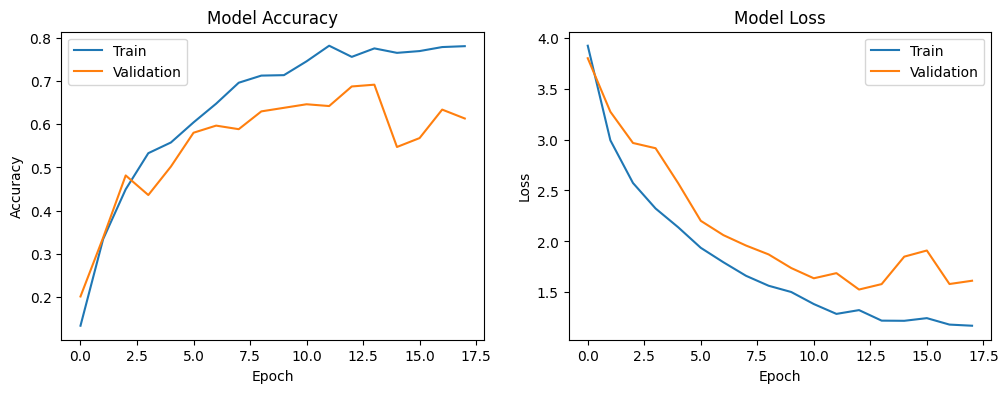

In [ ]:
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

print(tf.__version__)

# Step 1 - Build enhanced architecture
model = keras.Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(len(np.unique(y)), activation='softmax')
])

# Step 2 - Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Lower learning rate for regularization
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Step 3 - Fit with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Report Analysis




* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification owing to similar appearing traffic signs, if any    
=> speed limit signs like class1 and 2 look almost same, so there can be confusion.
* Comment on the performance of the MLP Classifier  
=> it has the accuracy of 0.8930 or 89.3% in the second layer. For single layer it is of 88.9% accuracy. The precision dropped to 0 for classes with only 2 samples (ex: class 19, 31)  
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy  
=> based on GridSearchCV, Best parameters are: tanh activation,alpha 0.0001, hidden layer size (128, 64)
Best CV accuracy: 0.8454, Adam optimizer works the best.  
* Report on training time vs convergence  
=> total time depends on number of epochs and complexity of the model. Early stopping works well at around 35 epoxhs.

